In [4]:
# toggle plot rendering to speed up the notebook
render_plots = False

In [5]:
from ortho_lib import *
from ortho_plot import *

import pandas as pd

# Note: This is a Work in Progress

# Using the FilesCategory class

We can use the `FilesCategory` class in `ortho_lib` to get filenames and dataframes as well

In [6]:
import os
data_dir = 'transformed_data'
category = 'Category_1'

# get the category path
category_path = os.path.join(data_dir, category)

files_category = FilesCategory(category_path)

We now have the option to fetch all patient ids in the category

In [7]:
patient_ids = sorted(files_category.get_patient_ids())
print(patient_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


We can then get all the exercises of a patient

In [8]:
ex = files_category.get_exercises(patient_ids[0])
print(ex)

['AB1.txt', 'AB2.txt', 'AF2.txt', 'AF1.txt', 'EL2.txt', 'EL1.txt', 'EHA2.txt', 'EH2.txt', 'EH1.txt', 'EHA1.txt', 'RF1.txt', 'RF2.txt']


We can also get the file path by directly passing the patient id and exercise name

In [9]:
path = files_category.fullpath(pat_id = 8, exercise = 'AB1.txt')
path

'transformed_data/Category_1/8/AB1.txt'

# Reading a file into a Pandas DataFrame
When we want to read the file into a dataframe, we can call the `exercise_to_df` or `exercise_to_df_with_rotation`.

In the original dataset, the z-axis is inverted (the patient is upside-down). To fix this, we can pass the invert_z boolean parameter to both functions.

We might want to reset the index hereafter to prevent duplicate index errors.

In [10]:
raw_data_file = FilesCategory(os.path.join('data', category)).fullpath(pat_id = 8, exercise = 'AB1.txt')

df = exercise_to_df(
    raw_data_file,  # use the raw data
    invert_z = True # invert z-axis
).reset_index(drop=True)

df_with_rotation = exercise_to_df_with_rotation(
    path # use transformed_data directory, no need to invert the z-axis
).reset_index(drop=True)

Using `ortho_plot`, we can create a 3d plot of the dataframe:

In [11]:
if render_plots == True:
    fig = get_df_figure_3d(df)
    fig.show()

# Other classes

`DFFrame` - Pandas DataFrame subclass, automatically calculates angles for the elbows, shoulders and arms.

### Methods:
No methods

## `Exercise` - Class to hold a DataFrame, category, exercise type and patient number.

### Methods:
    
`columns(*columns)` - invalid method, ignore
    
`draw(x, y, ax)` - draw the exercise's dataframe in a `matplotlib` `Axis` object or the `matplotlib` library itself, `x` and `y` are the column names for the x and y axes

## `Exercises` - Container that hold information about multiple exercises.

### Methods:

`append(o)` - add an `Exercise` object to the Exercises collection

`select_extype(extype)` - select a subset of Exercises where the exercise type is the specified `extype` (multiple are possible)

`select_patient(patient)` - select a subset of Exercises where the patient is the specified `patient` (multiple are possible)

`select_category(category)` - select a subset of Exercises where the category is the specified `category` (multiple are possible)

`drop_extype(extype)` - select a subset of Exercises where the exercise type is not the specified `extype` (multiple are possible)

`drop_patient(patient)` - select a subset of Exercises where the patient is not the specified `patient` (multiple are possible)

`drop_category(category)` - select a subset of Exercises where the category not is the specified `category` (multiple are possible)

`add_labels(file, oldcat='Category_3')` - reads some kind of file??? i dont know, it splits each line in the file by commas, first split is patient_id, second category, then adds the patient and category and deletes `oldcat` from the internal dictionary????

`Exercises.all()` - creates an Exercises object from all categories, all patients, all exercises.

`Exercises.from_exercise_objects(exs)` - Creates an `Exercises` object from a list of `Exercise` objects.

`Exercises.from_files(files)` - creates an Exercises object from the given `files`. Uses the `exercises_from_file` function.

`dump(file)` - dumps the file as a `pickle` blob, this saves a file (specified by `file`), such that it can be loaded in at a later moment (such that we do not have to recalculate everything)

`Exercises.load(file)` - loads a `pickle` saved by `dump`.

`to_df_min()` - returns a concatination of all patients' `to_df_min()`, transposes it.

`to_df_max()` - returns a concatination of all patients' `to_df_max()`, transposes it.

`to_np(df = None)` - Convert the dataframe `df`  or internal `df` to a numpy array

`to_np_min()` - use `to_df_min()` dataframe to convert to numpy array

`to_np_max()` - use `to_df_min()` dataframe to convert to numpy array

`lim(y)` - return a tuple of the minimal value of all exercise dataframes at column `y` and the maximal value of all exercise dataframes at column `y`.

`tsne(df = None, perplexity = 8)` - TSNE (t-Distributed Stochastic Embedding)

`draw(x, y, figwidth = 12, figheight = None, ncols = 5, nrows = None)` - create a MPL plot

### Properties:

`df` - Property, returns the dataframe of the current Exercises object

`ids` - Property, returns all patient ids of the current Exercises object

`y` - Property, returns a list of categories of all patient with the AB exercise??

## `Experiment` - Class to execute fitting and predicting models

### Methods:

`X(fs)` - Subset an `Exercises` DataFrame with the featureset `fs`.

`X_np(*columns)` - convert the result of `X(fs)` to a numpy array.

`fit(X_train, y_train)` - Fit a Logistic Regression model on the given training set `X_train`.

`fit_predict(X_train, y_train, X_valid)` - Fit a Logistic Regression model on the given training set `X_train`, and predict results on the validation set `X_valid`.

`fit_predict_p(X_train, y_train, X_valid)` - Fit a Logistic Regression model on the given training set `X_train`, and predict results on the validation set `X_valid` with `LogisticRegression.predict_proba()`.

`scale(X_train, X_valid)` - scale the validation set `X_valid` by the training set `X_train`.

`fit_loo(X, y)` - Use LeaveOneOut in combination with `fit_predict` to predict on a dataset `X,y`.

`fit_loo_p(X, y)` - Use LeaveOneOut in combination with `fit_predict_p` to predict on a dataset `X,y`.

`compare_featuresets(*feature, results=None)` - use `fit_loo` for all features `*feature`, and get the compared scores.

`keep_inliers(X, y, factor = 1.1)` - Subset the dataset `X` to filter out the individuals in the dataset that are too similar to the control group (`X[y == 0]`) by `factor`, which is a hyperparameter.

`fit_inliers1(featureset, factor = 1.1)` - Use LeaveOneOut in combination with `keep_inliers` to fit a model on valid inliers in the featureset `featureset` using `fit_predict`.

`fit_inliers1_p(featureset, factor = 1.1)` - Use LeaveOneOut in combination with `keep_inliers` to fit a model on valid inliers in the featureset `featureset` using `fit_predict_p`.

`fit_inliers(featureset, factor = 1.1, results = None)` - Use `fit_predict_inliers1()` to score the fitted model on the featureset `featureset`.

`fit_inliers_x(featureset, factor = 1.1, results = None)` - Use `fit_predict_inliers1()` to construct a transposed vertical stack of predictions of the featureset `featureset`.

`fit_inliers_x_p(featureset, factor = 1.1, results = None)` - Use `fit_predict_inliers1_p()` to construct a transposed vertical stack of predictions.

`fit_inliers_ensemble(featureset, factor = 1.1, results = None, name = None)` - fit models on the featureset `featureset` and use `fit_inliers1`. Keep the max values of the results of `fit_inliers1` and score the model on those values.

`keep_focussing(featureset, p = 0.5)` - 

`keep_alternating(*featureset, p = 0.5)`

`keep_alternating2(f1, f2, p = 0.5)`

`fit_focussing1(*featureset, p = 0.5)`

`fit_alternating(*featureset, p = 0.5, results = None)`

`fit_focussing(*featureset, p = 0.5, results = None)`

`fit_focussing_ensemble(*featureset, p = 0.5, results = None)`


## `FeatureSet` - Simple list of feature names

### Methods:

no methods

## `FilesCategory` - Convience class to fetch files

### Methods:

`__init__(path)` - initialize with the base `path`

`get_patient_ids()` - return a list of patient ids in the `path`

`get_exercises(pat_id, ex_type='')` - return a list of exercise names of a patient. If `ex_type` is left empty, it returns all exercises which or not 'overig'.

`fullpath(pat_id, exercise, ex_type)` - get the full path of a exercise of a specified patient. `exercise` should have the file extension included (`AB1.txt`). `ex_type` should be an exercise type (`AB`). `ex_type` will only be used if `exercise = None`. If both `exercise = None` and `ex_type = None`, then return all exercise paths of a patient. If `pat_id = None` then return all paths of all exercises of all patients.

`all_exercises()` - get all exercises paths

`from_categories()` - Get all exercises in the `data/` directory. 


## `Frame` - a row of data for one single `frame` and `sensor` of the dataset

### Methods:

`contains(sensor)` - check whether a sensor is in this frame.

`add_position(sensor, x, y, z)` - add a row of positional data of a sensor to the `Frame`

`to_df()` - convert the `Frame` to a Pandas `DataFrame`


## `FrameRotation` - an extension of `Frame`, includes rotational information

EXTENDS `Frame`

### Methods:

`add_rotation(x, y, z)` - Add a rotation matrix.


## `Patient` - used to construct a dataframe with AB, AF, EL, RF features

### Methods:

`remap(series)` - remap the series' index to ~something~

`to_df()` - convert the patient to a Pandas `DataFrame`

`to_df_min()` - convert the patient to a Pandas `DataFrame`, but only the minimal values of the features

`to_df_max()` - convert the patient to a Pandas `DataFrame`, but only the maximal values of the features

### Properties

`category` - return the category of 'AB'


## `Results` - Contains information about the results of an `Experiment`

### Methods:

`__init__(experiment)` - initialize with an `Experiment`.

`store(p_id, feature, tp, tn, fp, fn)` - Store a dict of `tp`, `tn`, `fp`, `fn`, with key (`p_id`, `feature`).

`score(fs, y_valid, y_pred)` - score the predicted results `y_pred` by `y_valid` for each feature in `FeatureSet` `fs`

`feature(f, func=None)` - apply function `func` to the stored value of all `patient_id`s  in the current `Experiment` and return a list of the values.

`feature_df(f)` - construct a Pandas `DataFrame` for the results of `feature(f)`.

`accuracy(f)` - calculate the accuracy for the feature `f`

`recall(f)` - calculate the recall for the feature `f`

`precision(f)` - calculate the featuer `f`

`report(sort = [], ascending = False)` - generate a report DataFrame, containing the columns `features`, `recall`, `precision` and `accuracy`. Sort values by `sort`, which is a column in the generated DataFrame


### Properties

`ids` - Get all the `patient_id`s for the current `Experiment`.

`columns` - Get the columns for this `Results dict`


# Static functions

#### `angle(s1,s2,s3)` - Calculate the angle between vectors (passes s2 as s4 to `angle4()`)

#### `angle4(s1,s2,s3,s4)` - Calculate the angle between 2 3-dimensional vectors

#### `df_sensors(df, s)` - subset a DataFrame for a single sensor `s`, but only columns `frame`, `x`, `y`, `z`

#### `exercise_to_df(file, invert_z = False)` - read a file `file` into a DataFrame, optionally invert the z-axis

#### `exercise_to_df_with_rotation(file, invert_z = False)` - read a file `file` into a DataFrame included the rotation matrices, optionally invert the z-axis

#### `exercise_from_file(file, category, extype, patient)` - Read an exercise file and construct a `Exercise` object using a `DFFrame`

#### `vnorm(x1, y1, z1, x2, y2, z2)` - Calculate the difference between two 3D vectors

#### `calculate_lr_diffs` - Calculate the difference between left and right sides of a patient in an exercise.

---

# Setting up an Experiment

In the end the library is about running experiments on the dataset. To do this we need to create an `Experiment` object. To create this, we need tot construct an `Exercises` object, we can do this as follows.

The original paper constructs a `DFFrame`, which automatically generates the following features: 
- `right_elbow` - calculates the angle between sensors 7, 8, 9
- `left_elbow` - calculates the angle between sensors 4, 5, 6
- `right_shoulder` - calculates the angle between sensors 2, 7, 8
- `left_shoulder` - calculates the angle between sensors 2, 4, 5
- `left_arm` - calculates the angle between sensors 4, 7, 8, 9
- `right_arm` - calculates the angle between sensors 7, 4, 8, 9

These are the features are evaluated in the original paper.

Let's take patient 1 of category 1 as an example

We can create an `Exercise` object as follows

In [12]:
category = '1'
pat_id = 1
ex = 'AB1.txt'

# get the datafile
raw_data_file = FilesCategory(os.path.join('transformed_data', 'Category_' + category)).fullpath(pat_id = pat_id, exercise = ex)

# create a dataframe
df = exercise_to_df(raw_data_file)

# split the dataframe in separate dataframes per sensor
dfs = [ df_sensors(df, s) for s in '23456789' ] 

# define reduction function
join_on_frame = lambda l, r: pd.merge(l, r, on='frame')

# merge the dataframes back to a single dataframe, with columns {x,y,z}_{sensor_num}
merged = reduce( join_on_frame, dfs )

# construct a DFFrame to calculate the arm, elbow and shoulder angles
dff = DFFrame(merged)
# dff

We can also use the `create_dfframe` function for short

In [13]:
# for short
dff = create_dfframe(1, 1, 'AB1.txt')

we can also do this for all of the exercises of a patient with the function `create_dfframes`

In [14]:
dffs = create_dfframes('Category_1', 1, extype = None)

Created empty list for 1


Or just use the category number works too

In [15]:
dffs = create_dfframes(1, 1, extype = None)

Created empty list for 1


Or fetch all patients in a category with all of their exercises.

note: This takes a long time, comment out to speed up notebook

In [16]:
# dffs = create_dfframes(1, extype = None)

or just fetch all of the files available

note: This takes a long time, comment out to speed up notebook

In [17]:
# dffs = create_dfframes(extype = None)

## Adding new features

The `DFFrame` class calculates the angle columns for the arms. We might want to add new features to the dataset setup. We can just transform the dataframe in a regular old way, but we can also follow the original structure by creating a new class, in which the new columns are calculated. 

Underneath is an example where the differences in the z-axis in the shoulder, elbow and wrist sensors.

Please note that the name of the feature you define needs to be in a certain format, the original implementation of generating columns has not been changed so follow this:
- suffix the new feature name with an underscore (`_`) to generate min and max column.

In [18]:
# define difference function
def diff(df, ax, s_1, s_2):
    """
    calculate the difference in the axis `ax` for the sensors `s_1`, `s_2`
    """
    return df[ax + '_' + s_1] - df[ax + '_' + s_2]

# extend DFFrame, so we keep the features defined in there
class CustomDFFrame(DFFrame):
    def __init__(self, *args, **kwargs):                                                                                                                                   
        super().__init__(*args, **kwargs)
        # make sure you suffix the column with _ to calculate min,max values
        self['diffzelbow_'] = diff(self, 'z', '7', '4')
        self['diffzshoulder_'] = diff(self, 'z', '8', '5')
        self['diffzwrist_'] = diff(self, 'z', '9', '6')

# call create_dfframe with a custom dfframe_class
dff = create_dfframe(1, 1, 'AB1.txt', dfframe_class = CustomDFFrame)

### SET THE PATIENT FEATURE LIST

This is an important step, we need to add the new features to the `Patient` class's `features` property for an exercise type.

Underneath the new features are added to the `AB` exercise type.

In [19]:
Patient.features['AB'].append('diffzelbow_')
Patient.features['AB'].append('diffzshoulder_')
Patient.features['AB'].append('diffzwrist_')

### Create an `Exercise` object

To run an experiment we need a collection of `Exercise` objects, wrapped in an `Exercises` object.

In [20]:
# create a Exercise object
exercise = Exercise(dff, category, 'AB', pat_id)

if render_plots == True:
    fig, ((ax_r_arm, ax_r_elbow, ax_r_shoulder), 
          (ax_l_arm, ax_l_elbow, ax_l_shoulder)) = plt.subplots(2, 3 ,figsize=(16,8))

    exercise.draw('frame', 'right_arm', ax_r_arm)
    exercise.draw('frame', 'right_elbow', ax_r_elbow)
    exercise.draw('frame', 'right_shoulder', ax_r_shoulder)
    exercise.draw('frame', 'left_arm', ax_l_arm)
    exercise.draw('frame', 'left_elbow', ax_l_elbow)
    exercise.draw('frame', 'left_shoulder', ax_l_shoulder)


### Collecting multiple `Exercise`s

With one `Exercise`, we can't do much. To run an experiment we need to have multiple `Exercise`s to get meaningful results.

In [21]:
patients = [('Category_1', 1), ('Category_1', 2), ('Category_3', 3), ('Category_3', 4)]

dffs = [(cat, pat, create_dfframe(cat, pat, 'AB1.txt', dfframe_class = CustomDFFrame)) for cat, pat in patients]

# let's construct some more Exercise object to run multiple evaluations at once
es = [Exercise(cdf, category, 'AB', pat) for cat, pat, cdf in dffs]

# we can now create an Exercises object from the exercise
exercises = Exercises.from_exercise_objects(es)

# we can now create an Experiment object
exp = Experiment(exercises, y_condition= lambda y: y == 'Category_1')

# we now have the minimal and maximal values for the z differences in the dataset for the selected patients, including the original angle columns of `DFFrame`
exp.df


,left_min_AB,right_min_AB,diffzelbow_min_AB,diffzshoulder_min_AB,diffzwrist_min_AB,left_max_AB,right_max_AB,diffzelbow_max_AB,diffzshoulder_max_AB,diffzwrist_max_AB
0,35.274130,38.448257,-0.023883,0.043755,-0.043799,155.122725,163.023362,0.095486,0.378021,0.395889
1,30.422372,28.740652,-0.049386,0.007614,-0.007572,157.490870,161.999498,0.013314,0.220343,0.463401
2,38.844050,30.422776,-0.022579,-1.113435,-2.098980,160.590066,81.835147,0.127890,0.111344,0.174530
3,31.249856,29.921317,-0.234232,-1.274303,-2.620798,136.583131,99.384028,0.237202,0.251884,1.087221


### Getting the dataset to train and test

To run an experiment, we need to get our input features and outputs. We do this with the `Experiment`'s `X()` function, and the `y` property.

In [22]:
# and select a featureset
X = exp.X(['diffzshoulder_min_AB', 'diffzshoulder_max_AB'])

# we know the first two patients are category 1, and the second two are category 3
y = exp.y
y

array([0., 0., 0., 0.])

# The setup above is going to raise errors when we actually run a fit function




# Below is the proper way to run experiments

## Running a bigger experiment
Above, we have selected 4 exercises. That's not gonna give us any meaningful results. Let's load in some more patients!

In [23]:
# this takes a while
dffs = create_dfframes([1,3], extype = 'AB', dfframe_class = CustomDFFrame, print_errors = False)
dffs

Created empty list for 1
Created empty list for 3


{'1': [(8,
   'AB',
        frame       x_2       y_2       z_2  x_3  y_3  z_3       x_4       y_4  \
   0        0 -1.432798 -0.130261 -2.209477  0.0  0.0  0.0 -0.338671  0.739227   
   1        1 -1.432798 -0.130261 -2.209477  0.0  0.0  0.0 -0.337030  0.739227   
   2        2 -1.434439 -0.130261 -2.209477  0.0  0.0  0.0 -0.338671  0.739227   
   3        3 -1.432834 -0.130261 -2.209477  0.0  0.0  0.0 -0.338671  0.739227   
   4        4 -1.432834 -0.130261 -2.209477  0.0  0.0  0.0 -0.338671  0.739227   
   ..     ...       ...       ...       ...  ...  ...  ...       ...       ...   
   142    142 -1.423024 -0.167713 -2.281099  0.0  0.0  0.0 -0.416821  0.716399   
   143    143 -1.421420 -0.166072 -2.282740  0.0  0.0  0.0 -0.410329  0.719681   
   144    144 -1.421420 -0.166072 -2.281099  0.0  0.0  0.0 -0.408688  0.722926   
   145    145 -1.421420 -0.169354 -2.281135  0.0  0.0  0.0 -0.407047  0.719644   
   146    146 -1.418174 -0.170958 -2.279494  0.0  0.0  0.0 -0.403802  0.721322

Let's convert the DFFrames to an Exercises object

In [24]:
exercises = dffs_to_exercises(dffs)
exercises

{'AB': {108: <ortho_lib.Exercise at 0x7f40d95b7b38>,
  103: <ortho_lib.Exercise at 0x7f40d95b7ba8>,
  101: <ortho_lib.Exercise at 0x7f40d95b7ef0>,
  114: <ortho_lib.Exercise at 0x7f40d95b7710>,
  122: <ortho_lib.Exercise at 0x7f40d95b76d8>,
  117: <ortho_lib.Exercise at 0x7f40d95b7f60>,
  115: <ortho_lib.Exercise at 0x7f40d95b7fd0>,
  106: <ortho_lib.Exercise at 0x7f40d95b7390>,
  111: <ortho_lib.Exercise at 0x7f40d95b7cc0>,
  113: <ortho_lib.Exercise at 0x7f40d95b73c8>,
  107: <ortho_lib.Exercise at 0x7f40d95b7320>,
  129: <ortho_lib.Exercise at 0x7f40d95b7a90>,
  123: <ortho_lib.Exercise at 0x7f40d95b7c88>,
  121: <ortho_lib.Exercise at 0x7f40d95b7d68>,
  109: <ortho_lib.Exercise at 0x7f40d95b7da0>,
  120: <ortho_lib.Exercise at 0x7f40d95b7dd8>,
  119: <ortho_lib.Exercise at 0x7f40d95b7cf8>,
  125: <ortho_lib.Exercise at 0x7f40d95b7c50>,
  126: <ortho_lib.Exercise at 0x7f40d95b7a58>,
  112: <ortho_lib.Exercise at 0x7f40d8fbe080>,
  110: <ortho_lib.Exercise at 0x7f40d8fbe588>,
  130: 

Wrap it in an `Experiment`

In [25]:
exp = Experiment(exercises, y_condition= lambda y: y == 'Category_3')
exp

Select the features we want to evaluate

In [26]:
fs = FeatureSet(['diffzshoulder_min_AB', 'diffzshoulder_max_AB'])

Get the input and ouput

In [27]:
X = exp.X(fs)
y = exp.y
y
# WE ACTUALLY DO NOT NEED TO DO THIS, THIS IS ALL INCLUDED IN THE FUNCTION UNDERNEATH

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Fit the features and use the OR-ensemble to generate the results

In [28]:
result = exp.fit_inliers_ensemble(fs)

Report the results

In [29]:
result.report()

,features,recall,precision,accuracy
0,"diffzshoulder_min_AB,diffzshoulder_max_AB",0.594595,1.0,0.776119


We can also check multiple feature sets

In [30]:
fss = [
#     ('diffzshoulder_min_AB', ['diffzshoulder_min_AB']),
#     ('diffzshoulder_max_AB', ['diffzshoulder_max_AB']),
#     ('diffzelbow_min_AB', ['diffzelbow_min_AB']),
#     ('diffzelbow_max_AB', ['diffzelbow_max_AB']),
#     ('diffzwrist_min_AB', ['diffzwrist_min_AB']),
#     ('diffzwrist_max_AB', ['diffzwrist_max_AB']),
    ('Shoulder differences Z (min/max) (AB)', ['diffzshoulder_min_AB', 'diffzshoulder_max_AB']),
    ('Elbows differences Z (min/max) (AB)', ['diffzelbow_min_AB', 'diffzelbow_max_AB']),
    ('Wrists differences Z (min/max) (AB)', ['diffzwrist_min_AB', 'diffzwrist_max_AB']),
    ('Elbow + Shoulder differences Z (min/max) (AB)', ['diffzelbow_min_AB', 'diffzelbow_max_AB', 'diffzshoulder_min_AB', 'diffzshoulder_max_AB']),
    ('Elbow + Wrist differences Z (min/max) (AB)', ['diffzelbow_min_AB', 'diffzelbow_max_AB', 'diffzwrist_min_AB', 'diffzwrist_max_AB']),
    ('Wrist + Shoulder differences Z (min/max) (AB)', ['diffzwrist_min_AB', 'diffzwrist_max_AB', 'diffzshoulder_min_AB', 'diffzshoulder_max_AB']),
    ('All differences Z (min/max) (AB)', ['diffzwrist_min_AB', 'diffzwrist_max_AB', 'diffzelbow_min_AB', 'diffzelbow_max_AB', 'diffzshoulder_min_AB', 'diffzshoulder_max_AB']),
    ('Right angles (AB)', ['right_min_AB', 'right_max_AB']),
    ('Left angles (AB)', ['left_min_AB', 'left_max_AB']),
    ('All angles (AB)', ['right_min_AB', 'right_max_AB', 'right_min_AB', 'right_max_AB']),
    ('All angles + All differences Z (AB)', ['right_min_AB', 'right_max_AB', 'right_min_AB', 'right_max_AB','diffzwrist_min_AB', 'diffzwrist_max_AB', 'diffzelbow_min_AB', 'diffzelbow_max_AB', 'diffzshoulder_min_AB', 'diffzshoulder_max_AB']),
]

# totals.
results = Results(exp)
for name, fs in fss:
    results = exp.fit_inliers_ensemble(fs, results = results, name = name)
results.report()


,features,recall,precision,accuracy
0,Wrists differences Z (min/max) (AB),0.594595,1.000000,0.776119
1,Elbow + Shoulder differences Z (min/max) (AB),0.702703,1.000000,0.835821
2,Right angles (AB),0.378378,0.933333,0.641791
3,All angles + All differences Z (AB),0.783784,0.966667,0.865672
4,Wrist + Shoulder differences Z (min/max) (AB),0.648649,1.000000,0.805970
5,All differences Z (min/max) (AB),0.756757,1.000000,0.865672
6,Left angles (AB),0.270270,1.000000,0.597015
7,Elbow + Wrist differences Z (min/max) (AB),0.756757,1.000000,0.865672
8,All angles (AB),0.378378,0.933333,0.641791
9,Elbows differences Z (min/max) (AB),0.513514,1.000000,0.731343


#### Tweaking hyperparameters

As you can see above, not all of the precisions of the featuresets are equal to `1.0`. We want this number to be equal to `1.0`, because we do not want any false positive results in our report.
To tweak this we can play the the `factor` hyperparameter

In [31]:
#trying to find a factor where for the angles precision == 1

base_factor = 1.0

featuresets = [
    ('Right angles (AB)', ['right_min_AB', 'right_max_AB']),
    ('Left angles (AB)', ['left_min_AB', 'left_max_AB']),
    ('All angles (AB)', ['right_min_AB', 'right_max_AB', 'right_min_AB', 'right_max_AB'])
]

res = Results(exp)
ress = {}

for i in np.arange(0, 1, 0.05):
    for name, fs in featuresets:
        if name not in ress:
            ress[name] = {}
            
        factor_pos = base_factor + i
        factor_neg = base_factor - i
        results_pos = exp.fit_inliers_ensemble(fs, name = name, factor = factor_pos)
        results_neg = exp.fit_inliers_ensemble(fs, name = name, factor = factor_neg)
        ress[name][factor_pos] = results_pos.precision(name)
        ress[name][factor_neg] = results_neg.precision(name)

In [32]:
precise_factors_all_angles = []

for factor, precision in ress['All angles (AB)'].items():
    if precision == 1.0:
        print(name + ', f:' + str(factor), ', precision: ' + str(precision))
        precise_factors_all_angles.append(factor)

All angles (AB), f:1.35 , precision: 1.0
All angles (AB), f:1.4 , precision: 1.0
All angles (AB), f:1.45 , precision: 1.0
All angles (AB), f:1.5 , precision: 1.0
All angles (AB), f:1.55 , precision: 1.0
All angles (AB), f:1.6 , precision: 1.0
All angles (AB), f:1.65 , precision: 1.0
All angles (AB), f:1.7000000000000002 , precision: 1.0
All angles (AB), f:1.75 , precision: 1.0
All angles (AB), f:1.8 , precision: 1.0
All angles (AB), f:1.85 , precision: 1.0
All angles (AB), f:1.9 , precision: 1.0
All angles (AB), f:1.9500000000000002 , precision: 1.0


In [33]:
# generate reports for fss 

results = Results(exp)
reports = {}
for factor in precise_factors_all_angles:
    for name, fs in fss:
        results = exp.fit_inliers_ensemble(fs, results = results, name = name, factor = factor)
    reports[factor] = results.report()
    
for factor, report in reports.items():
    print('Factor: ' + str(factor) + '\nReport: ' + str(report) + '\n')

Factor: 1.35
Report:                                          features    recall  precision  \
0             Wrists differences Z (min/max) (AB)  0.459459        1.0   
1   Elbow + Shoulder differences Z (min/max) (AB)  0.648649        1.0   
2                               Right angles (AB)  0.270270        1.0   
3             All angles + All differences Z (AB)  0.675676        1.0   
4   Wrist + Shoulder differences Z (min/max) (AB)  0.513514        1.0   
5                All differences Z (min/max) (AB)  0.648649        1.0   
6                                Left angles (AB)  0.243243        1.0   
7      Elbow + Wrist differences Z (min/max) (AB)  0.594595        1.0   
8                                 All angles (AB)  0.270270        1.0   
9             Elbows differences Z (min/max) (AB)  0.432432        1.0   
10          Shoulder differences Z (min/max) (AB)  0.513514        1.0   

    accuracy  
0   0.701493  
1   0.805970  
2   0.597015  
3   0.820896  
4   0.731343  


In [34]:
totals = pd.DataFrame(columns = ['features', 'factor', 'recall', 'precision', 'accuracy'])

for factor, report in reports.items():
    _df = report[report['features'] == 'All angles + All differences Z (AB)'].reset_index(drop=True)
    _df.loc[_df.index, ['factor']] = factor
    print(_df, totals)
    
totals

                              features    recall  precision  accuracy  factor
0  All angles + All differences Z (AB)  0.675676        1.0  0.820896    1.35 Empty DataFrame
Columns: [features, factor, recall, precision, accuracy]
Index: []
                              features    recall  precision  accuracy  factor
0  All angles + All differences Z (AB)  0.648649        1.0   0.80597     1.4 Empty DataFrame
Columns: [features, factor, recall, precision, accuracy]
Index: []
                              features    recall  precision  accuracy  factor
0  All angles + All differences Z (AB)  0.648649        1.0   0.80597    1.45 Empty DataFrame
Columns: [features, factor, recall, precision, accuracy]
Index: []
                              features    recall  precision  accuracy  factor
0  All angles + All differences Z (AB)  0.648649        1.0   0.80597     1.5 Empty DataFrame
Columns: [features, factor, recall, precision, accuracy]
Index: []
                              features    re

,features,factor,recall,precision,accuracy


In [35]:
# calculate the cronbach's alpha value
# results.cronbach('All differences (AB)', 'All angles (AB)')

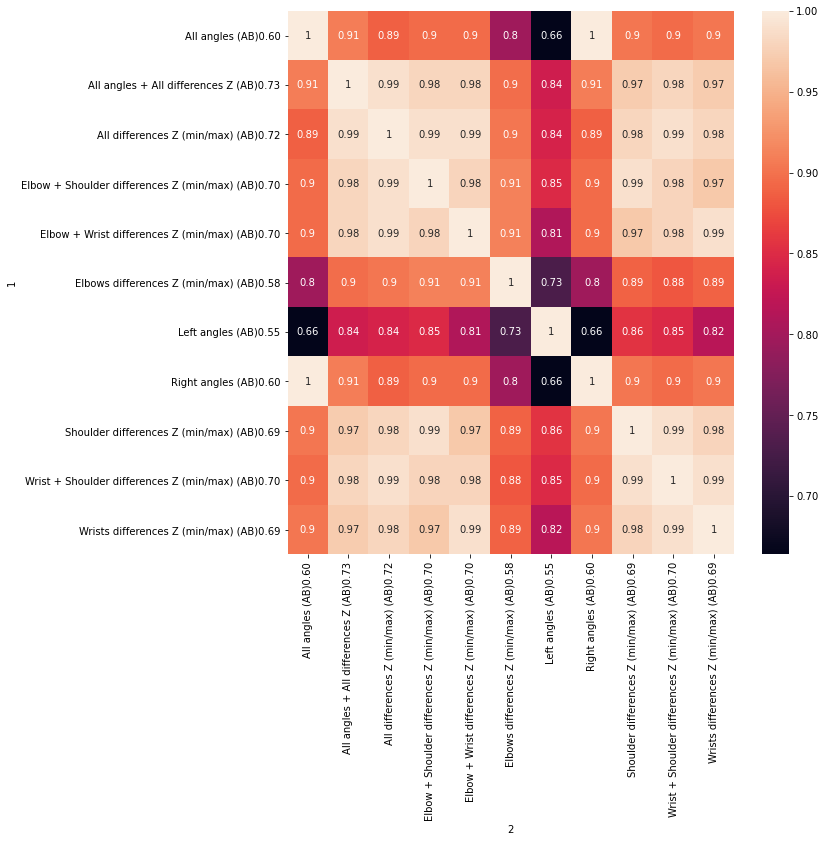

In [36]:
# print an cronbach coeffience matrix
results.heatmap()

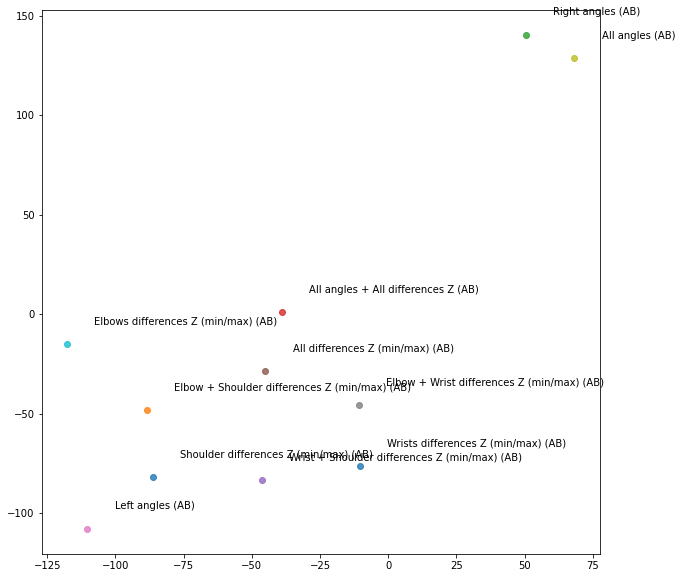

In [37]:
# or a TSNE distribution
results.tsne()

# Next steps

In the end, we want to pinpoint to what category a person belongs to. For this we want to load all categories and all exercises.

In [38]:
# this can be more efficient
all_ex_dffs = merge_dffs(create_dfframes([1,2,3,4],extype = 'EL', dfframe_class = CustomDFFrame, print_errors = False),
                 create_dfframes([1,2,3,4],extype = 'AB', dfframe_class = CustomDFFrame, print_errors = False))
all_ex_dffs = merge_dffs(all_ex_dffs,
                 create_dfframes([1,2,3,4],extype = 'AF', dfframe_class = CustomDFFrame, print_errors = False))
all_ex_dffs = merge_dffs(all_ex_dffs,
                 create_dfframes([1,2,3,4],extype = 'EH', dfframe_class = CustomDFFrame, print_errors = False))

Created empty list for 1
Created empty list for 2
Created empty list for 3
Created empty list for 4


Created empty list for 1
Created empty list for 2
Created empty list for 3
Created empty list for 4


Created empty list for 1
Created empty list for 2
Created empty list for 3
Created empty list for 4


Created empty list for 1
Created empty list for 2
Created empty list for 3
Created empty list for 4


As not all people did all of the exercises we want to evaluate, we want to filter out the ones that didn't. Otherwise the `Experiment` class will throw a `KeyError` while calculating the `y` values.

In [39]:
import copy

exercises = dffs_to_exercises(all_ex_dffs)
new_exercises = copy.deepcopy(exercises)
for patient in exercises.patients:
    keys = exercises[patient].keys()
    if not ('EH' in keys and 'EL' in keys and 'AB' in keys and 'AF' in keys):
        new_exercises = new_exercises.drop_patient(patient)
        print('dropped ' + str(patient) + ' because there is a missing exercise')
    
# exercises = exercises.drop_patient(130, 338, 235, 236)

dropped 338 because there is a missing exercise
dropped 441 because there is a missing exercise
dropped 407 because there is a missing exercise
dropped 423 because there is a missing exercise
dropped 421 because there is a missing exercise


In [40]:
for f in Patient.features:
    Patient.features[f].clear()
    Patient.features[f].append('diffzelbow_')
    Patient.features[f].append('diffzshoulder_')
    Patient.features[f].append('diffzwrist_')


exp = Experiment(new_exercises, y_condition= lambda y: y != 'Category_1')

In [41]:
exp.y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
features = exp.df.columns.to_numpy()

In [ ]:
exp.compare_features(features)

In [43]:
import itertools
combinations = []
for i in range(1, len(features)):
    combinations.append(list(itertools.combinations(features, i)))

In [44]:
from itertools import chain 
all_combinations = list(chain.from_iterable(combinations))


In [45]:
print(len(features), len(all_combinations))

18 262142


In [46]:
# lets not iterate over 262142 elements....
# res = Results(exp)
# for combi in all_combinations:
#     print('Evaluating combination', combi)
#     res = exp.fit_inliers_ensemble(combi, results=res)